In [1]:

# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s')

In [13]:
# Load Dataset
url = 'https://raw.githubusercontent.com/MontyVasita18/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df=pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
21,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28,28.24
612,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28,25.97
938,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,13.12
579,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,28,22.63
...,...,...,...,...,...,...,...,...,...
673,212.0,141.3,0.0,203.5,0.0,973.4,750.0,7,15.03
1015,322.5,148.6,0.0,185.8,8.5,951.0,709.5,28,52.43
827,522.0,0.0,0.0,146.0,0.0,896.0,896.0,7,50.51
610,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08


In [47]:
# Performing Univariate Analysis
from collections import OrderedDict

stats=[]

for i in df.columns:
    numerical_stats= OrderedDict({
        'feature':i,
        'type':df[i].dtype,
        'null_values':df[i].isnull().sum(),
        'unique_values':df[i].nunique(),
        'mode':df[i].mode()[0],
        'mean':df[i].mean(),
        'std_deviation':df[i].std(),
        'min_value':df[i].min(),
        'max_value':df[i].max(),
        'range':df[i].max() - df[i].min(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurtosis(),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    stats.append(numerical_stats)

df_stats=pd.DataFrame(stats)


df_stats

,feature,type,null_values,unique_values,mode,mean,std_deviation,min_value,max_value,range,skewness,kurtosis,IQR
0,cement,float64,0,278,362.6,281.167864,104.506364,102.00,540.0,438.00,0.509481,-0.520652,157.625
1,blast_furnace_slag,float64,0,185,0.0,73.895825,86.279342,0.00,359.4,359.40,0.800717,-0.508175,142.950
2,fly_ash,float64,0,156,0.0,54.188350,63.997004,0.00,200.1,200.10,0.537354,-1.328746,118.300
3,water,float64,0,195,192.0,181.567282,21.354219,121.80,247.0,125.20,0.074628,0.122082,27.100
4,superplasticizer,float64,0,111,0.0,6.204660,5.973841,0.00,32.2,32.20,0.907203,1.411269,10.200
5,coarse_aggregate,float64,0,284,932.0,972.918932,77.753954,801.00,1145.0,344.00,-0.040220,-0.599016,97.400
6,fine_aggregate,float64,0,302,594.0,773.580485,80.175980,594.00,992.6,398.60,-0.253010,-0.102177,93.050
7,age,int64,0,14,28.0,45.662136,63.169912,1.00,365.0,364.00,3.269177,12.168989,49.000
8,concrete_compressive_strength,float64,0,845,33.4,35.817961,16.705742,2.33,82.6,80.27,0.416977,-0.313725,22.425


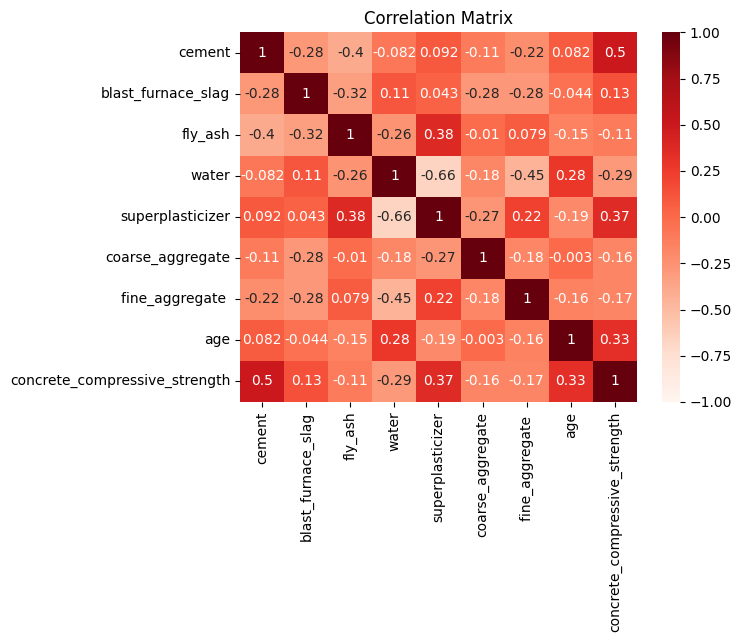

In [42]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ------->['Concrete_compressive_strength']
sns.heatmap(df.corr(),annot=True,yticklabels=True,vmax=1,center=0,vmin=-1, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()
